In [77]:
import os
from dateutil.parser import parse
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wine = pd.read_csv(
    '/Users/richardlafferty/Downloads/winequality-red.csv', sep = ';', header = None, error_bad_lines=False)

In [3]:
wine.columns = wine.iloc[0]
wine = wine.iloc[1:]
wine = wine.rename(columns={"fixed acidity": "fixed_acidity",
                            "volatile acidity": "volatile_acidity",
                            "citric acid": "citric_acid",
                            "residual sugar": "residual_sugar",
                            "free sulfur dioxide": "free_sulfur_dioxide",
                            "total sulfur dioxide": "total_sulfur_dioxide"})
#print(list(wine.columns))
print(wine.head())

0 fixed_acidity volatile_acidity citric_acid residual_sugar chlorides  \
1           7.4              0.7           0            1.9     0.076   
2           7.8             0.88           0            2.6     0.098   
3           7.8             0.76        0.04            2.3     0.092   
4          11.2             0.28        0.56            1.9     0.075   
5           7.4              0.7           0            1.9     0.076   

0 free_sulfur_dioxide total_sulfur_dioxide density    pH sulphates alcohol  \
1                  11                   34  0.9978  3.51      0.56     9.4   
2                  25                   67  0.9968   3.2      0.68     9.8   
3                  15                   54   0.997  3.26      0.65     9.8   
4                  17                   60   0.998  3.16      0.58     9.8   
5                  11                   34  0.9978  3.51      0.56     9.4   

0 quality  
1       5  
2       5  
3       5  
4       6  
5       5  


In [4]:
print(list(wine.columns))
print(wine.dtypes)
wine['fixed_acidity'] = wine.fixed_acidity.astype(float)
wine['volatile_acidity'] = wine.volatile_acidity.astype(float)
wine['citric_acid'] = wine.citric_acid.astype(float)
wine['residual_sugar'] = wine.residual_sugar.astype(float)
wine['chlorides'] = wine.chlorides.astype(float)
wine['free_sulfur_dioxide'] = wine.free_sulfur_dioxide.astype(float)
wine['total_sulfur_dioxide'] = wine.total_sulfur_dioxide.astype(float)
wine['density'] = wine.density.astype(float)
wine['pH'] = wine.pH.astype(float)
wine['sulphates'] = wine.sulphates.astype(float)
wine['alcohol'] = wine.alcohol.astype(float)
wine['quality'] = wine.quality.astype(float)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
0
fixed_acidity           object
volatile_acidity        object
citric_acid             object
residual_sugar          object
chlorides               object
free_sulfur_dioxide     object
total_sulfur_dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object


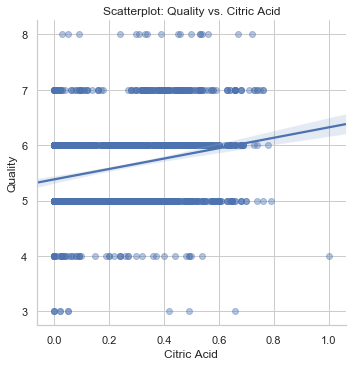

'g = sns.lmplot(y=\'tip\', \n               x=\'total_bill\',\n               data=books, # Data.\n               fit_reg=True, # The regression line also includes a 95% confidence envelope.\n               scatter_kws={\'alpha\':0.4})\ng.set_ylabels("Tips")\ng.set_xlabels("Total Bill")\nplt.title(\'Scatterplot with regression line: Meal Tips by Total Bill\')\nplt.show()'

In [78]:
g = sns.lmplot(y='quality', # Variable 1.
               x='citric_acid', # Variable 2.
               data=wine, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Quality")
g.set_xlabels("Citric Acid")
plt.title('Scatterplot: Quality vs. Citric Acid')
plt.show()

'''g = sns.lmplot(y='tip', 
               x='total_bill',
               data=books, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()'''

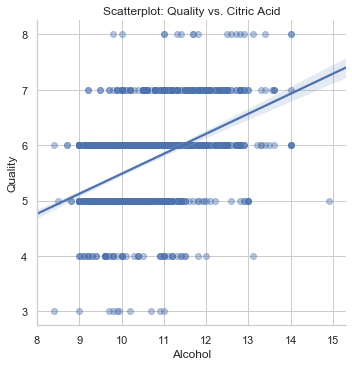

In [79]:
g = sns.lmplot(y='quality', # Variable 1.
               x='alcohol', # Variable 2.
               data=wine, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Quality")
g.set_xlabels("Alcohol")
plt.title('Scatterplot: Quality vs. Citric Acid')
plt.show()

In [11]:
sns.set(style="darkgrid")

# Use catplot (previous versions of seaborn use factorplot)
g = sns.catplot(x="sulphates", y="quality", hue="time", data=wine,
                    kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-11-342f621ec405>, line 5)

In [51]:
cereal = pd.read_csv('/Users/richardlafferty/Downloads/cereal.csv')
cereal.sort_values(by='rating', ascending = False).reset_index()
cereal_10 = cereal.iloc[:10]

In [23]:
print(cereal.head())
print(cereal.dtypes)

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
name         object
mfr          object
type         object
calories      int64
protein       int64
fat  

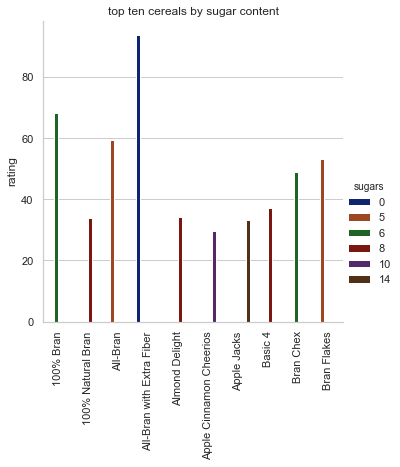

In [63]:
#sns.set(style="whitegrid")

# Use catplot (previous versions of seaborn use factorplot)
g = sns.catplot(x='name', y='rating', hue="sugars", 
                data=cereal_10, kind="bar", palette="dark")
#g.despine(left=True)
g.set_ylabels("rating")
g.set_xlabels("")
g.set_xticklabels(rotation=90)
plt.title('top ten cereals by sugar content')
plt.show()

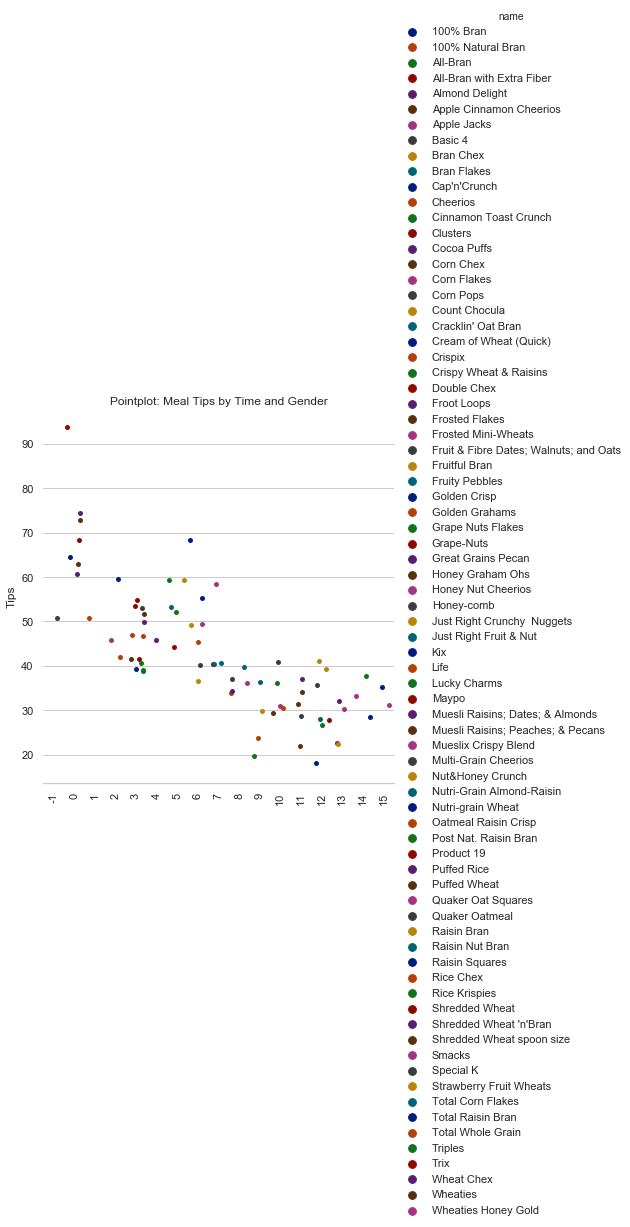

In [72]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.catplot(x="sugars", y="rating", hue="name", data=cereal,
                   height=6, kind="strip", palette="dark",ci=95,dodge=True)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")


plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()

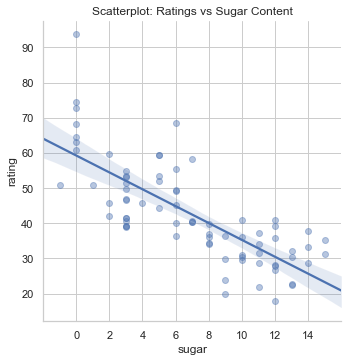

In [76]:
g = sns.lmplot(y='rating', # Variable 1.
               x='sugars', # Variable 2.
               data=cereal, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("rating")
g.set_xlabels("sugar")
plt.title('Scatterplot: Ratings vs Sugar Content')
plt.show()